In [ ]:
pip install scikit-learn==0.24.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 22.3 MB 1.3 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.24.2 which is incompatible.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## LOAD DATA HASIL PREPROCESS

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/berita_bersih.csv')
df.head()

,Judul,class
0,jaring nusantara ahy milik modal kuat pimpin b...,0
1,amat rusia apresiasi niat indonesia bawa misi ...,0
2,misi damai jokowi ukraina rusia pakar pintu di...,0
3,jokowi temu putin bawa misi damai rusiaukraina...,0
4,krisis pangan dunia akibat sanksi eropa salah ...,0


## VEKTORISASI

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(df['Judul'].values,df['class'].values,test_size=0.2,random_state=42,stratify=df['class'].values)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_train_text = tfidf_vectorizer.fit_transform(X_train)
tfidf_test_text = tfidf_vectorizer.transform(X_test)

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X_train)

In [ ]:
feature_names = vectorizer.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
def tf_idf(text):
  tfidf_matrix = vectorizer.transform([text]).todense()
  feature_index = X[0,:].nonzero()[1]
  skor = zip([feature_names[i] for i in feature_index], [X[0,X] for X in feature_index])
  return dict(skor)

In [ ]:
tf_idf(X_train[0])

IndexError: ignored

In [ ]:
print()

  (0, 4743)	0.3798321897703393
  (0, 468)	0.3665229977494949
  (0, 3094)	0.42606713387010575
  (0, 2075)	0.23784480383041037
  (0, 1868)	0.31236759424655675
  (0, 1017)	0.3296284432048209
  (0, 143)	0.5263616835946213
  (1, 3321)	0.3524517194728389
  (1, 5335)	0.3210713966066299
  (1, 385)	0.42165592782644506
  (1, 5667)	0.42165592782644506
  (1, 3888)	0.33655441874263387
  (1, 4459)	0.42165592782644506
  (1, 5534)	0.25023031098210496
  (1, 5785)	0.1646915411397221
  (1, 2075)	0.1905318615764746
  (2, 4937)	0.40655596056128673
  (2, 5661)	0.38244586727251045
  (2, 4769)	0.38244586727251045
  (2, 747)	0.47814756252399915
  (2, 1049)	0.39095504505596307
  (2, 3771)	0.4008885497767333
  (3, 627)	0.5547484121473784
  (3, 4837)	0.6200874119347409
  (3, 3136)	0.5547484121473784
  :	:
  (3423, 1097)	0.2974476242477417
  (3423, 1900)	0.2483681081520117
  (3423, 80)	0.23764569221584572
  (3424, 4036)	0.5837449464391423
  (3424, 3989)	0.4106758105255666
  (3424, 1758)	0.5164330691518921
  (3424,

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [ ]:
from sklearn.model_selection import GridSearchCV

## GRID 1

In [ ]:
param_grid = {'C': [0.1, 1, 10],'kernel': ['linear']}

In [ ]:
grid = GridSearchCV(SVC(),param_grid,refit=True,cv =10, verbose=3)
grid.fit(tfidf_train_text,y_train)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
[CV 1/10] END .............C=0.1, kernel=linear;, score=0.828 total time=   0.9s
[CV 2/10] END .............C=0.1, kernel=linear;, score=0.805 total time=   0.9s
[CV 3/10] END .............C=0.1, kernel=linear;, score=0.848 total time=   0.9s
[CV 4/10] END .............C=0.1, kernel=linear;, score=0.813 total time=   0.9s
[CV 5/10] END .............C=0.1, kernel=linear;, score=0.860 total time=   0.9s
[CV 6/10] END .............C=0.1, kernel=linear;, score=0.773 total time=   0.9s
[CV 7/10] END .............C=0.1, kernel=linear;, score=0.825 total time=   0.9s
[CV 8/10] END .............C=0.1, kernel=linear;, score=0.804 total time=   0.9s
[CV 9/10] END .............C=0.1, kernel=linear;, score=0.827 total time=   0.9s
[CV 10/10] END ............C=0.1, kernel=linear;, score=0.813 total time=   0.9s
[CV 1/10] END ...............C=1, kernel=linear;, score=0.872 total time=   0.7s
[CV 2/10] END ...............C=1, kernel=linear;

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear']}, verbose=3)

In [ ]:
print(grid.best_params_)
print(grid.score(tfidf_test_text,y_test))

{'C': 1, 'kernel': 'linear'}
0.9008168028004667


In [ ]:
grid.best_score_

0.8806471962218471

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
grid_predictions = grid.predict(tfidf_test_text)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))#Output

[[397  41]
 [ 44 375]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.90       438
           1       0.90      0.89      0.90       419

    accuracy                           0.90       857
   macro avg       0.90      0.90      0.90       857
weighted avg       0.90      0.90      0.90       857



In [ ]:
dt = {'grid_predictions': grid_predictions, 'y_test': y_test}

In [ ]:
dt = pd.DataFrame(dt)

In [ ]:
a = []
for i in range(len(grid_predictions)):
  if y_test[i] == grid_predictions[i]:
    a.append(i)

In [ ]:
a = pd.DataFrame(a)

In [ ]:
len(y_test) - len(a)

85

In [ ]:
y_test[76]

0

In [ ]:
grid_predictions[76]

1

In [ ]:
a.describe()

TypeError: ignored

Confusion matrix is 
 [[397  41]
 [ 44 375]]


Text(42.0, 0.5, 'Actual')

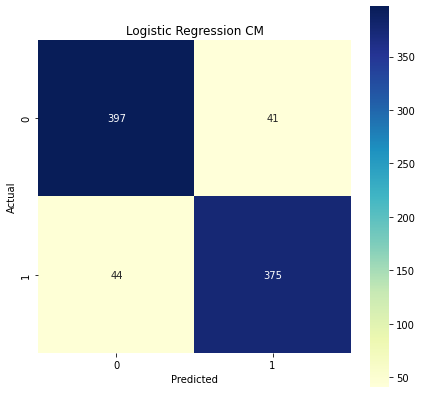

In [ ]:
## confusion matrix
conf_mat_n=confusion_matrix(y_test, grid_predictions)
print("Confusion matrix is \n",conf_mat_n)

## plotting confusion matrix
plt.figure(figsize=(7,7))
plt.title("Logistic Regression CM")
sns.heatmap(conf_mat_n, square=True,cmap="YlGnBu",annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

## GRID 2

In [ ]:
param_grid2 = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'kernel': ['linear']}

In [ ]:
grid2 = GridSearchCV(SVC(),param_grid2,refit=True, cv =10, verbose=3)
grid2.fit(tfidf_train_text,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits
[CV 1/10] END ...........C=0.001, kernel=linear;, score=0.513 total time=   0.8s
[CV 2/10] END ...........C=0.001, kernel=linear;, score=0.513 total time=   0.8s
[CV 3/10] END ...........C=0.001, kernel=linear;, score=0.510 total time=   0.8s
[CV 4/10] END ...........C=0.001, kernel=linear;, score=0.510 total time=   0.8s
[CV 5/10] END ...........C=0.001, kernel=linear;, score=0.510 total time=   0.8s
[CV 6/10] END ...........C=0.001, kernel=linear;, score=0.510 total time=   0.8s
[CV 7/10] END ...........C=0.001, kernel=linear;, score=0.510 total time=   0.8s
[CV 8/10] END ...........C=0.001, kernel=linear;, score=0.512 total time=   0.8s
[CV 9/10] END ...........C=0.001, kernel=linear;, score=0.512 total time=   0.8s
[CV 10/10] END ..........C=0.001, kernel=linear;, score=0.512 total time=   0.8s
[CV 1/10] END ............C=0.01, kernel=linear;, score=0.513 total time=   0.8s
[CV 2/10] END ............C=0.01, kernel=linear;

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'kernel': ['linear']},
             verbose=3)

In [ ]:
print(grid2.best_params_)
print(grid2.score(tfidf_test_text,y_test))

{'C': 1, 'kernel': 'linear'}
0.9008168028004667


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
grid_predictions = grid.predict(tfidf_test_text)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))#Output